# "Bayesian Parameter Estimation with Outliers"
> "We illustrate an advanced Bayesian Parameter Estimation workflow by considering data with outliers"

- toc:true
- branch: master
- badges: true
- comments: true
- author: John J. Molina
- categories: [Data Analysis, Parameter Estimation, Outliers]

# Motivation / Disclaimer

This is the second in what I hope will be a long series of posts on Data Analysis, Probabilistic Programming and Machine Learning.
We have recently become interested in incorporating such techniques into our more traditional Physics simulations and for this, we started a Seminar/Reading club with colleagues in our University.
I plan to posts all of our study guides here. These posts are only intended as an easy way to store and retrieve our notes, nothing more...so expect brevity and don't be too disappointed if you find any glaring mistakes and/or omissions (but please let me know if you do).

Having covered the basics of Bayesian Data Analysis, following Chapters 2 and 3 of the excellent tutorial book "Data Analysis : A Bayesian Tutorial", written by Dr. Devinder S. Sivia, with contributions by Prof. John Skilling, we now consider a slightly more complicated case. 

Now, we study how to perform parameter estimation in the presence of outliers.

# References
This topic is discussed in some detail in Sivia's book (Ch. 8, Least-Squares Extensions), as well as Jaynes' (Ch. 21, Outliers and Robustness).
- Data Analysis : A Bayesian Tutorial, second edition. D.S. Sivia with J. Skilling, Oxford, Oxford University Press (2006)
- Probability Theory: The Logic of Science. E. T. Jaynes, Cambridge, Cambridge Unviversity Press (2003)

In addition, we also found the following paper to be very useful and in line with the discussions found in the books mentioned above
- [Data analysis recipes: Fitting a model to data](https://arxiv.org/abs/1008.4686), D. W. Hogg, J. Bovy, D. Lang, arXiv:1008.4686 (2010)

Below we basically follow Jaynes, using the data of Hogg et al.

# Intro

Let us consider that our data consists of a series of noisy measurements $D= \{y_k\}_{k=1}^N$, which on prior information $I$ are assumed to be generated by a model $y = f(X; \Theta)$, parametrized by $p$ parameters $\Theta = (\Theta^1, \ldots, \Theta^p)$. We consider the case where $X=(X^1, \ldots, X^d)$ is a d-dimensional vector, but $y$ is assumed to be a scalar. Furthermore, assume that on prior information, we know that the results of any given measurement can be either good or bad. 

When analyzing the data, in order to determine the parameters $\Theta$, we want to make sure that we use a robust method that is able to account for these outliers. As always with these parameter estimation problems, the quantity we are interested is the following posterior distribution
\begin{align}
P(\Gamma \lvert D, I) &\propto P(D, \lvert \Gamma ,I) P(\Gamma\lvert I) \\
&= L(\Gamma) \,\Pi(\Gamma) \\
L(\Gamma) &= P(D, \lvert \Gamma ,I) \\
\Pi(\Gamma) &= P(\Gamma\lvert I)
\end{align}
with $\Gamma=(\Theta, \Xi)$, where $\Theta$ is parametrizing the target function $f(X;\Theta)$, and $\Xi$ refers to all the remaining parameters (e.g., those related to the goodness/badness of the points).

# The "Mixture" or "Two-Model" Model 

To evaluate the likelihood, we consider the case of good/bad points separately. 
If a point is good, it is assumed to be sampled from a distribution $P_{\text{Good}}=G$, whereas bad points are sampled from $P_{\text{Bad}}= B$. 

Assuming Gaussian errors, we set
\begin{align}
P(y_k\lvert\mathrm{Good}_k,  \Gamma, I) = G(y_k\lvert \Theta) &\sim \mathcal{N}\left(f(X_k;\Theta), \sigma_k^2\right) \\
P(y_k\lvert\mathrm{Bad}_k, \Gamma, I)
= B(y_k\lvert \Theta, \eta) &\sim \mathcal{N}\left(f(X_k;\Theta), \sigma_k^2 + \eta^2 \right)
\end{align}
Good points will be normally distributed around the true values $f(X_k;\Theta)$, with a standard deviation given by the measured error bars. Bad points, on the other hand, will be distributed around the true values with a much larger variance, given by $\sigma_k^2 + \eta^2$. Here, $\eta^2$ is an additional parameter which defines the variance of the bad points. I think that whether or not this represents the true physical origin behind the outliers is of secondary importance (as we are not trying to make inferences about this process). What matters here is that we can build a probabilistic model that can explain the data, i.e., the fact that we can have good/bad points, and that the bad points can show very large deviations with respect to the true values. I think we would obtain roughly the same results if we uncoupled the Bad data from the model (as done in Jaynes treatment), 
\begin{align}
y_k\lvert \text{Bad} \sim \mathcal{N}\left(c, \eta^2\right)
\end{align}
with $c$ an additional nuissance parameter to be learned from the data.

Assuming independent measurements, the full likelihood $D=\{y_k\}_{k=1}^N$ can be expressed as a product of likelihoods for each individual measurement, such that

\begin{align}
L(\Gamma) = P(D\lvert \Gamma, I) &= \prod_k \Big[P(y_k\lvert\Gamma, I)\Big] \\
&= \prod_k\Big[P\big(y_k,(\mathrm{Good}_k \text{ or } \mathrm{Bad}_k)\lvert\Gamma, I\big)\Big]\\
&= \prod_k\Big[P\big(y_k, \mathrm{Good}_k\lvert \Gamma, I\big) + P\big(y_k, \mathrm{Bad}_k\lvert\Gamma, I \big)\Big] \\
&= \prod_k\Big[P\big(\mathrm{Good}_k\lvert \Gamma, I\big) P(y_k\lvert \mathrm{Good}_k, \Gamma, I) +
P\big(\mathrm{Bad}_k\lvert\Gamma, I\big) P(y_k\lvert \mathrm{Bad}_k, \Gamma, I)\Big]
\end{align}

Where we have simply used marginalization over the Good/Bad state of the points.
Now, let us assume that the probability of observing a given sequence of good/bad points is invariant under permutations. What matters is just the number of good/bad points, not the order in which they were obtained. Let $u$, which we don't know, be the probability that any given point is good, Jaynes calls this the "purity" of the data. The likelihood is then given by
\begin{align}
P(\mathrm{Good}_k\lvert \Gamma, I)&= u\\
L(\Gamma) = P(D\lvert \Gamma, I) 
&= \prod_k\Big[uP(y_k\lvert \mathrm{Good}_k, \Gamma, I) +
(1-u) P(y_k\lvert \mathrm{Bad}_k, \Gamma, I)\Big] \\
&= \prod_k\Big[u G(y_k\lvert \Theta) + (1-u) B(y_k\lvert \Theta, \eta)\Big]
\end{align}
where $\Gamma = (\Theta, u, \eta)$
\begin{align}
\Theta &: \textrm{model function parameters} \\
u &: \textrm{data purity, i.e., probability that given point is good} \\
\eta &: \textrm{variance for outliers}
\end{align}

The posterior for $\Theta$, which are the parameters we are actually interested in, is obtained by marginalizing over $u$ and $\eta$
\begin{align}
P(\Theta\lvert D, I)&= \iint\mathrm{d}u\mathrm{d}\eta\, P(\Theta, u, \eta\lvert D, I) \\
&= \frac{\iint\mathrm{d}u\mathrm{d}\eta\, L(\Theta, u, \eta) \Pi(\Theta, u, \eta)}{\iiint \mathrm{d}\Theta\mathrm{d}u\mathrm{d} \eta\,L(\Theta, u, \eta) \Pi(\Theta, u, \eta)} 
\end{align}
where we have explicitly included the normalization constant in the definition.

We can use this model, with hyper-parameters $u$ and $\eta$, to compute the posterior for $\Theta$, and thus find the "best-fit" to the data, in the presence of outliers.

## Digression on the two-model model

Let us look in a bit more detail into what exactly we are calculating here.
For ease of reading (to avoid having to write $P$ all over the place), we will again follow Jaynes and rewrite the prior $\Pi(\Gamma)$ as
\begin{align}
\Pi(\Theta, u, \eta)&= P(\Theta, u, \eta\lvert I)\\
&= P(\Theta\lvert I) P(u, \eta\lvert \Theta, I) \\
&= \Pi(\Theta) H(u, \eta\lvert \Theta, I)
\end{align}

where $\Pi(\Theta)=P(\Theta\lvert I)$ and $H(u,\eta\lvert\Theta, I)=P(u, \eta\lvert \Theta, I)$. 

Now, defining the "pseudo-likelihood" $\bar{L}$ as
\begin{align}
\bar{L}(\Theta) &= \iint\mathrm{d}u\mathrm{d}\eta L(\Theta, u, \eta) H(u, \eta\lvert \Theta, I)
\end{align}

The marginalized posterior for $\Theta$ becomes
\begin{align}
P(\Theta\lvert D, I) &= \frac{\bar{L}(\Theta) \Pi(\Theta)}{\int\mathrm{d}\Theta \bar{L}(\Theta)\Pi(\Theta)}
\end{align}

To understand what this pseudo-likelihood is giving us, let's first expand the definition of $L(\Theta, u, \eta)$ in terms of the good and bad likelihoods $G$ and $B$. We obtain the following
\begin{align}
L(\Theta, u, \eta) &= \prod_k\Big[u G(y_k\lvert \Theta) + (1-u)B(y_k\lvert \Theta, \eta)\Big]\\
&= 
u^N \prod_i G(y_i\lvert \Theta) +u^{N-1}(1-u)\sum_{j=1}^N B(y_j\lvert \Theta, \eta) \prod_{i\ne j} G(y_i\lvert \Theta) \\
&\quad + u^{N-2}(1-u)^{2}\sum_{j<k} B(y_j\lvert\Theta,\eta) B(y_k\lvert\Theta,\eta) \prod_{i\ne j,k} G(y_i\lvert\Theta)\\
&\quad\vdots\\
&\quad + (1-u)^{N}\prod_{j}^N B(y_j\lvert\Theta,\eta)
\\
&=u^N L(\Theta) \\
&\quad+ u^{N-1}(1-u) \sum_{j=1}^N B(y_j\lvert\Theta, \eta) L_j(\Theta)\\
&\quad+ u^{N-2}(1-u)^2\sum_{j<k}^N B(y_j\lvert\Theta,\eta)B(y_k\lvert\Theta,\eta) L_{jk}(\Theta) \\
&\quad\vdots\\
&\quad+ (1-u)^N B(y_1\lvert\Theta,\eta)B(y_2\lvert\Theta,\eta)\cdots B(y_N\lvert\Theta,\eta) \\
&= L^{(0)}(\Theta, u, \eta)+ L^{(1)}(\Theta, u, \eta) + L^{(2)}(\Theta, u, \eta) + \ldots + L^{(N)}(\Theta, u, \eta)
\end{align}

Here, we use $L(\Theta) =\prod_i G(y_i\lvert\Theta)$ to denote the likelihood of the pure model, i.e., one without outliers. Likewise $L_j(\Theta)$ is the likelihood of observing $\{y_{i\ne j}\}$ from the pure model, $L_{jk}$ that of observing $\{y_{i\ne j,k}\}$, etc. 

Plugging this expression into the definition of $\bar{L}$,
\begin{align*}
\bar{L} &= \iint \mathrm{d}u\mathrm{d}\eta L(\Theta, u, \eta) H(u,\eta\lvert \Theta, I) \\
&= \iint \mathrm{d}u\mathrm{d}\eta\, \left[L^{(0)}(\Theta, u, \eta) + L^{(1)}(\Theta, u, \eta) + \cdots + L^{(N)}(\Theta, u, \eta)\right] H(u, \eta\lvert \Theta, I)
\end{align*}
we would obtain the following for the first term
\begin{align}
\iint\mathrm{d}u\mathrm{d}\eta L^{(0)}(\Theta, u, \eta) H(u, \eta\lvert\Theta, I) &=\iint\mathrm{d}u\mathrm{d}\eta\, u^N L(\Theta) H(u, \eta\lvert\Theta, I)\\
&= L(\Theta)\int\mathrm{d}u\, u^n \int\mathrm{d}\eta\, H(u,\eta\lvert\Theta,I) \\
&= L(\Theta)\underbrace{\int\mathrm{d}u\, u^n H(u\lvert\Theta, I)}_{\text{Probability that all points are good}}
\end{align}
where in the second to last step we marginilize $h(u,\eta\lvert \Theta, I)$ over $\eta$. Notice that the integral in the last line evaluates to the probability all points are good, regardless of $u$ and conditioned on $\Theta$ and $I$,
\begin{align*}
P(\text{All points good}\lvert \Theta, I) &= \int\mathrm{d}u\, P(\text{All points good}, u\lvert \Theta, I) \\
&= \int\mathrm{d}u\, P(\text{All points good}\lvert u, \Theta, I) P(u\lvert\Theta, I) \\
&= \int\mathrm{d}u\, u^N P(u\lvert\Theta, I) = \int\mathrm{d}u\, u^N H(u\lvert\Theta, I)
\end{align*}

We would obtain something similar for the second term
\begin{align}
\iint\mathrm{d}u\mathrm{d}\eta\, L^{(1)}(\Theta, u, \eta) H(u,\eta\lvert\Theta, I) &=\iint\mathrm{d}u\mathrm{d}\eta\, u^{N-1}(1-u) B(y_j\lvert\Theta,\eta) L_j(\Theta) H(u,\eta\lvert\Theta, I)\\
&= L_j(\Theta)\underbrace{\int B(y_j\lvert\Theta, I) \underbrace{\mathrm{d}\eta\int\mathrm{d}u\, u^{N-1}(1-u) H(u,\eta\lvert\Theta, I)}_{\text{Probability that any given point ($y_j$) is bad,}\atop\text{all others are good, and $\eta$ lies in $(\eta, \eta+\mathrm{d}\eta)$, conditioned on $\Theta$ and $I$.}}}_{\text{Probability that $j$-th point is bad, with value $y_j$,}\atop\text{and all others are good, conditined on $\Theta$ and $I$.}}
\end{align}

Thus, we see that the pseudo-likelihood can be expressed as
\begin{align}
\bar{L}(\Theta) &= \iint\mathrm{d}u\mathrm{d}\eta L(\Theta, u, \eta) H(u, \eta\lvert \Theta, I) \\
&= \big(\textrm{Probability all data is good}\big)\times\big(\textrm{Likelihood for all data}\big) \\
&\,+ \sum_j \big(\textrm{Probability only $x_j$ is bad}\big)\times\big(\textrm{Likelihood without $x_j$}\big)\\
&\,+ \sum_{j<k}\big(\textrm{Probability only $x_j$ and $x_k$ are bad}\big)\times\big(\textrm{Likelihood without $x_j$ or $x_k$}\big)\\
&\;\vdots\\
&\, + \sum_j\big(\textrm{Probability only $x_j$ is good}\big)\times\big(\textrm{Likelihood with only $x_j$}\big)\\
&\, + \big(\textrm{Probability all data is bad}\big)
\end{align}
which is just a weighted-average of the "pure" likelihoods $L(\Theta)$, over all possible combinations of good/bad points, weighted over the corresponding prior probabilities. Note that the sums here are over non-repeating indices.

# The Exponential Model

Above, we saw that we could express the likelihood as a sum of likelihoods for all possible combinations of good/bad points. Then, the pseudo-likelihood was obtained as an average over the hyper-parameters $u$ and $\eta$. 

Consider the contribution to the likelihood form the term with exactly $M$ good points ($m=N-M$ bad points)
\begin{align}
L^{(m)}(\Theta, u, \eta)&= \sum_{j_1 < j_2 <\cdots< j_m}u^{M}(1-u)^{m} L_{j_1,\ldots,j_m}(\Theta) B(y_{j_1}\lvert\Theta, \eta)\ldots B(y_{j_m}\lvert\Theta,\eta) \\
&=\sum_{j_1<j_2<\cdots< j_m} u^{M}(1-u)^{m} \Big(\prod_{i\ne j_1,\ldots,j_m} G(y_i\lvert\Theta)\Big)\Big(B(y_{j_1}\lvert\Theta,\eta)\cdots B(y_{j_m}\lvert\Theta,\eta)\Big)
\end{align}

Up to now we haven't really cared about which point are good/bad. However, we could just as well introduce additional hyperparameters $q_i$ to keep track of this information. Let
\begin{align}
q_i =\begin{cases}
1 &\text{point $i$ is good} \\
0 &\text{point $i$ is bad}
\end{cases}
\end{align}

Such that $q_{j_1} = q_{j_2}= \cdots = q_{j_m}= 0$, $q_{i\ne j_1, j_2,\cdots j_m} = 1$, and $M= \sum_i q_i$. The likelihood term we are considering then becomes
\begin{align}
L^{(m)}(\Theta, u, \eta)&=\underbrace{\sum_{j_1<j_2<\cdots<j_m} \sum_{q_1,q_2,\ldots q_N} \delta_{q_{j_1},\cdots,q_{j_m}}^{0} \delta_{i\ne j_1,\cdots j_m}^{1}}_{\sum_{\{q_j\}_\text{m bad}}} \underbrace{\phantom{\prod_i^N}u^M(1-u)^m\quad}_{P(\{q_k\}\lvert\Gamma, I)} \underbrace{\prod_i^N\Big(G(y_i\lvert\Theta)^{q_i}\times B(y_i\lvert\Theta,\eta)^{1-q_i}\Big)}_{= P(D\lvert \Gamma,\{q_k\},I)}
\end{align}

allowing us to write down the full likelihood as 
\begin{align}
L(\Theta, u, \eta) &= \sum_{\{q_j\}_{m=0}} u^{N-m}(1-u)^{m}\prod_{i=1}^N\Big(G(y_i\lvert \Theta)^{q_i}\times B(y_i\lvert\Theta,\eta)^{1-q_i}\Big) \\
&+ \sum_{\{q_j\}_{m=1}} u^{N-m}(1-u)^m\prod_{i=1}^N\Big(G(y_i\lvert\Theta)^q_i\times B(y_i\lvert\Theta,\eta)^{1-q_i}\Big) \\
&\vdots\\
&+ \sum_{\{q_j\}_{m=N}} u^{N-m}(1-u)^m\prod_{i=1}^N\Big(G(y_i\lvert\Theta)^{q_i}\times B(y_i\lvert\Theta,\eta)^{1-q_i}\Big) \\
L(\Theta, u, \eta) &= \sum_{q_1,q_2,\ldots q_n} \underbrace{\phantom{\Pi_i}u^{N-m} (1-u)^m\quad}_{= P(\{q_i\}\lvert \Theta, u, \eta, I)} \underbrace{\prod_i\Big(G(y_i\lvert\Theta)^{q_i}\times B(y_i\lvert\Theta,\eta)^{1-q_i}\Big)}_{P(D\lvert\{q_i\},\Theta, u, \eta) = L(\{q_i\}, \Theta, u, \eta)} \\
&= \sum_{q_1,\ldots,q_N}P(\{q_i\}\lvert \Theta, u, \eta, I)\times P(D\lvert \{q_i\}, \Theta, u, \eta)
\end{align}

Recall the definition of the posterior
\begin{align}
P(\Theta, u, \eta\lvert D, I)&\propto L(\Theta, u, \eta) \Pi(\Theta, u, \eta) \\
&= \sum_{q_1,\ldots q_N} L(\{q_i\}, \Theta, u, \eta) \underbrace{P(\{q_i\}\lvert \Theta, u, \eta, I) P(\Theta, u, \eta\lvert I)}_{= P(\{q_i\}, \Theta, u, \eta\lvert I) \equiv \Pi(\{q_i\}, \Theta, u, \eta)} \\
&= \sum_{q_1,\ldots q_N} L(\{q_i\}, \theta, u, \eta) \Pi(\{q_i\}, \Theta, u, \eta) \\
&\propto \sum_{q_1,\ldots q_N} P(\Theta, u, \eta, \{q_i\}\lvert D, I)
\end{align}
Thus, we see that the posterior for the "mixture" model is nothing but the marginalized posterior (over $q_i$) of the "exponential" model, which considers the goodness/badness of each of the points explicitly (with a global purity value $u$).

Within the exponential model, we then have
\begin{align}
\Gamma &= (\Theta, u, \eta, \{q_i\})\\
P(\Gamma\lvert D, I) &\propto L(\Gamma) \Pi(\Gamma) \\
L(\Gamma)&= \prod_i\Big(G(y_i\lvert\Theta)^{q_i}\times B(y_i\lvert\Theta, \eta)^{1-q_i}\Big)
\end{align}

As always, it's more convenient to work with the logarithm of the likelihood
\begin{align}
\ln{L} &= \sum_i\Big[q_i \ln{G(y_i\lvert\Theta)} + (1-q_i)\ln{B(y_i\lvert\Theta, \eta)}\Big]\\
&= \sum_{\text{good}} \ln{G(y_i\lvert\Theta)} + \sum_{\text{bad}}\ln{B(y_i\lvert\Theta, \eta)}\\
&= \sum_{\text{good}} \ln{\left[\frac{1}{\sqrt{2\pi \sigma_i^2}} \exp\left(\frac{-(y_i - f(X_i;\Theta))^2}{2\sigma_i^2}\right)\right]} +
\sum_{\text{bad}} \ln{\left[\frac{1}{\sqrt{2\pi(\sigma_i^2+\eta^2)}} \exp{\left(\frac{-(y_i-f(X_i;\Theta))^2}{2(\sigma_i^2+\eta^2)}\right)}\right]} \\
&= \sum_{\text{good}}\left[-\frac{\left(y_i - f(X_i;\Theta)\right)^2}{2\sigma_i^2} - \frac{1}{2}\ln{2\pi\sigma_i^2}\right] + 
\sum_{\text{bad}}\left[-\frac{\left(y_i - f(X_i;\Theta)\right)^2}{2\left(\sigma_i^2+\eta^2\right)} - \frac{1}{2}\ln{2\pi(\sigma_i^2+\eta^2)}\right]
\end{align}

# Numerical Example (Mixture Model)

We will use the data given in the paper by Hogg, Bovy and Lang. While they consider the case of correlated x/y noise, here we will simply consider the case of noise in $y$.

In [76]:
#import numpy as np #### If using windows...
import jax
import jax.numpy as np
import numpy as onp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pymc3 as pm
import theano as th
import theano.tensor as tt
from scipy.optimize import minimize
### remove all jax stuff on windows...
from jax import grad, jit, vmap, jacfwd, jacrev
from jax.config import config; config.update("jax_enable_x64", True)
from matplotlib.collections import EllipseCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.collections as clt

In [88]:
mpl.style.use(['seaborn-poster', 'seaborn-muted'])

#betanalphas' colormap
colors = ["#DCBCBC","#C79999","#B97C7C","#A25050","#8F2727", "#7C0000","#DCBCBC20", "#8F272720","#00000060"]
color  = {i[0]:i[1] for i in zip(['light','light_highlight','mid','mid_highlight','dark','dark_highlight','light_trans','dark_trans','superfine'],colors)}

def hessian(f):
    """Returns a function which computes the Hessian of a function f
           if f(x) gives the values of the function at x, and J = hessian(f)
           J(x) gives the Hessian at x"""
    return jit(jacfwd(jacrev(f)))

quantiles_sig = np.array([.0014,.0228,.1587,0.5, 0.8413,.9772,.9986]) # (\mu +/- 3σ, \mu +/- 2σ, \mu +/- σ)
quantiles_sig2= quantiles_sig[1:-1]
quantiles_dec = np.arange(0.1, 1.0, 0.1) # [0.1, ..., 0.9] -> (80%, 60%, 40%, 20%) credible interval
def plot_quantiles(ax, xdata, ydata,quantiles,colors=colors,**kwargs):
    """Plot quantiles of data as a function of x
       Note : q-th quantile of 'data' is the value 'q' away from the minimum to the maximum in a sorted copy of 'data'"""
    quantiles = np.quantile(ydata,quantiles, axis=0) 
    for i,c in zip(range(len(quantiles)//2), colors): 
        ax.fill_between(xdata, quantiles[i,:], quantiles[-(i+1),:], color=c) 
    ax.plot(xdata, quantiles[len(quantiles)//2], color=colors[-1], lw=4, **kwargs)

# Auxiliary routines to plot 2D MCMC data
# adapted from http://jakevdp.github.io/blog/2014/06/14/frequentism-and-bayesianism-4-bayesian-in-python/
def compute_sigma_level(trace1, trace2, nbins=20):
    """From a set of traces, bin by number of standard deviations"""
    L, xbins, ybins = onp.histogram2d(trace1, trace2, nbins)
    L[L == 0] = 1E-16
    logL = np.log(L)

    shape = L.shape
    L = L.ravel()

    # obtain the indices to sort and unsort the flattened array
    i_sort = np.argsort(L)[::-1]
    i_unsort = np.argsort(i_sort)

    L_cumsum = L[i_sort].cumsum()
    L_cumsum /= L_cumsum[-1]
    
    xbins = 0.5 * (xbins[1:] + xbins[:-1])
    ybins = 0.5 * (ybins[1:] + ybins[:-1])

    return xbins, ybins, L_cumsum[i_unsort].reshape(shape)

def plot_MCMC_trace(ax, trace1, trace2, *,nbins,scatter, **kwargs):
    """Plot traces and contours"""
    xbins, ybins, sigma = compute_sigma_level(trace1, trace2, nbins)
    ax.contour(xbins, ybins, sigma.T, levels=[0.683, 0.955], **kwargs)
    if scatter:
        ax.plot(trace1, trace2, ',k', alpha=0.4)
        
def colorbar(axes, mappable, *, loc="right", size="5%", pad=.1):
    """Add colorbar to axes"""
    divider = make_axes_locatable(axes)
    cax = divider.append_axes(loc, size=size, pad=0.1)
    cb = plt.colorbar(mappable, cax=cax)
    return cb

In [3]:
# data taken from Hogg et al.
x  = np.array([201.,244, 47,287,203, 58,210,202,198,158,165,201,157,131,166,160,186,125,218,146], dtype=np.float64)
y  = np.array([592.,401,583,402,495,173,479,504,510,416,393,442,317,311,400,337,423,334,533,344], dtype=np.float64)
σx = np.array([  9, 14, 11,  7,  5,  9,  4,  4, 11,  7,  5,  5,  5,  6,  6,  5,  9,  8,  6,  5], dtype=np.float64)
σy = np.array([ 61, 25, 38, 15, 21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22], dtype=np.float64)
ρxy= np.array([-0.84, 0.31, 0.64, -0.27, -0.33, 0.67, -0.02, -0.05, -0.84, -0.69, -.30, -0.46, -0.03, 0.50, 0.73, -0.52, 0.90, 0.40, -0.78, -0.56], dtype=np.float64)

i_sort   = np.argsort(x)
x_sorted = x[i_sort]

def computeErrors():
    # Compute full sigma matrix
    Σ = onp.zeros((len(y), 2, 2))
    Σ[:,0,0] = σx**2
    Σ[:,0,1] = Σ[:,1,0] = σx*σy*ρxy
    Σ[:,1,1] = σy**2
    Σinv     = np.array([np.linalg.inv(s) for s in Σ])

    # Diagonalize
    n     = len(Σ)
    λ,η,θ = onp.zeros((n,2)), onp.zeros((n,2,2)), onp.zeros(n)
    for i, σ in enumerate(Σ):
        w, v = onp.linalg.eig(σ)                                        # unordered eigenvalues and eigenvectors
        w, v = onp.real_if_close(w), onp.real_if_close(np.transpose(v))
        w, v = zip(*sorted(zip(w,v), reverse=True))                     # descending order
        λ[i,:]  = onp.array(w)
        η[i,:,:]= onp.array(v)
        θ[i]    = onp.arctan2(v[0][1], v[0][0])*180/np.pi               # CCW angle with respect to x-axis of major axis (eigen-vector)

    return np.array(λ),np.array(η),np.array(θ),np.array(Σ)
λ,η,θ,Σ = computeErrors()

The full covariance matrix for the data given by Hogg et al. can be computed as
\begin{align*}
\Sigma^2 &=
\begin{pmatrix}
    \sigma_x^2 & \rho_{xy}\sigma_x\sigma_y \\
    \rho_{xy}\sigma_x\sigma_y & \sigma_y^2
\end{pmatrix}
\end{align*}
with the values of $\sigma_x$, $\sigma_y$, and $\rho_{xy}$ given in the paper.

Let's plot the full data, using ellipses to represent the $1\sigma$ contours.

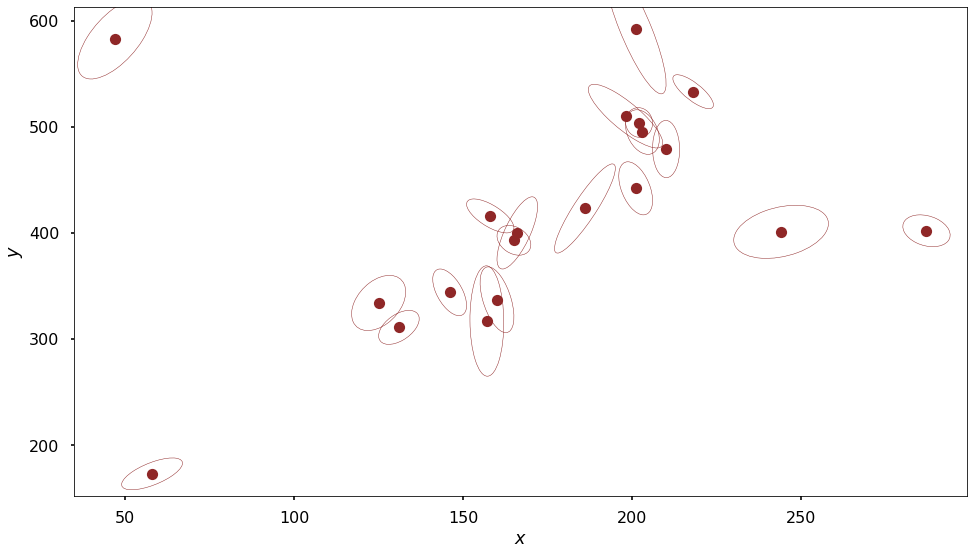

In [4]:
fig,ax = plt.subplots(figsize=(16,9))
ax.plot(x, y, marker='o', ls='None', color=color['dark'])
ec   = EllipseCollection(2*np.sqrt(λ[:,0]), 2*np.sqrt(λ[:,1]), θ, units='xy', \
                         offsets=np.column_stack((x,y)), transOffset=ax.transData, edgecolor=color['dark'], facecolor='None')
ax.add_collection(ec);
ax.set_xlabel(r'$x$'); ax.set_ylabel(r'$y$')
plt.show()

Ignoring the correlated erros, we consider only the case of measurement errors in $y$, given by $\sigma_y$. The data now looks like this

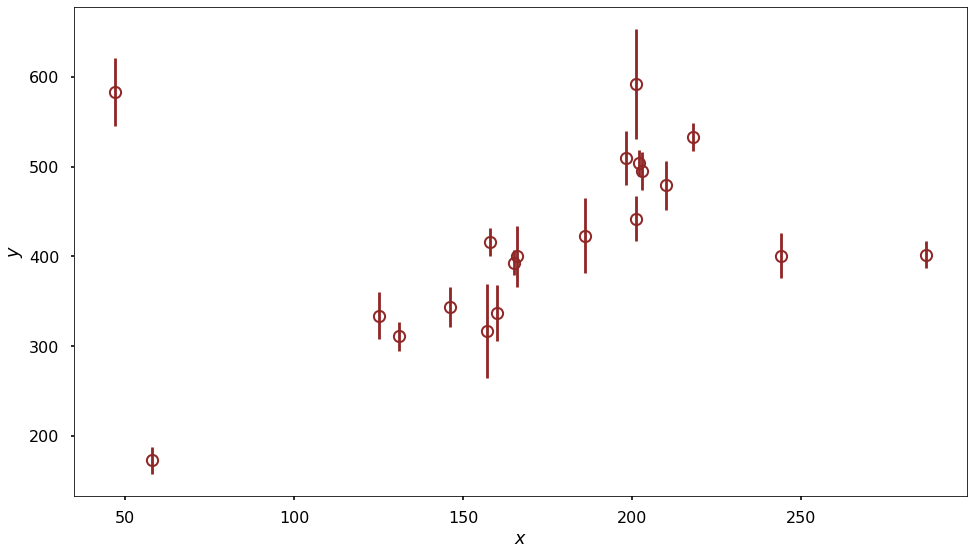

In [5]:
fig,ax = plt.subplots(figsize=(16,9))
ax.errorbar(x,y,σy, marker='o', ls='None', color=color['dark'],  mfc='None', mec=color['dark'], mew=2)
ax.set_xlabel(r'$x$'); ax.set_ylabel(r'$y$')
plt.show()

## (Naive) Least-Squares

Before trying our Bayesian solution, let us consider a naive (least-squares) fit to the data...

In [6]:
def func(x,θ):
    return θ[0]*x + θ[1]

@jit
def chi2(θ):
    return np.sum((y-func(x,θ))**2/σy**2)
grad_chi2  = jit(grad(chi2)) # \nabla χ^2
hess_chi2  = hessian(chi2)   # \nabla\nabla χ^2

fit       = minimize(chi2, np.ones(2), method='BFGS', jac=grad_chi2, options={'maxiter':100, 'disp':1})
fit_ihess = np.linalg.inv(hess_chi2(fit['x'])) # inverse hessian evaluated at the optimum value Θ_0

Optimization terminated successfully.
         Current function value: 289.963723
         Iterations: 13
         Function evaluations: 15
         Gradient evaluations: 15


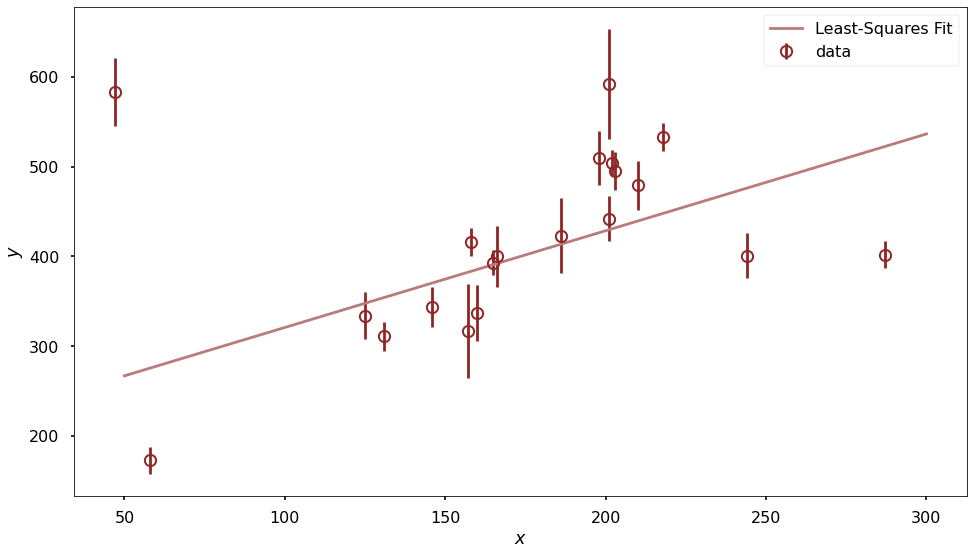

In [7]:
fig,ax = plt.subplots(figsize=(16,9))
xrange = np.linspace(50,300)
ax.errorbar(x, y, σy, marker='o', ls='None', color=color['dark'], label='data',  mfc='None', mec=color['dark'], mew=2)
ax.plot(xrange,func(xrange,fit['x']), color=color['mid'], label='Least-Squares Fit')
ax.set_xlabel(r'$x$'); ax.set_ylabel(r'$y$')
ax.legend()
plt.show()

This is clearly not what we want.


## Least-Squares extension

Now let's consider the (marinalized) mixture model, assuming uniform priors, all we need is to maximize the likelihood
\begin{align}
L(\Gamma) &= P(D\lvert \Gamma, I) \\
&= \prod_k\Big[u G(y_k\lvert \Theta) + (1-u) B(y_k\lvert \Theta, \eta)\Big]\\
\ln{L(\Gamma)} &= \sum_k\ln{\Big[u G(y_k\lvert\Theta) + (1-u) B(y_k\lvert\Theta, \eta)\Big]}
\end{align}
where $\Gamma = (\Theta, u, \eta)$
\begin{align}
\Theta &: \textrm{model function parameters} \\
u &: \textrm{data purity, i.e., probability that given point is good} \\
\eta &: \textrm{variance for outliers}
\end{align}


In [8]:
def func(x,θ):
    return θ[0]*x + θ[1]
def normal(x,μ,σ2):
    return 1.0/np.sqrt(2*np.pi*σ2)*np.exp(-(x-μ)**2/(2*σ2))
@jit
def loss(Γ):  # = ln L
    θ,u,η  = Γ[:2],Γ[2],np.exp(Γ[3]) # Γ = (Θ, u, ln(η))
    ymodel = func(x,θ)
    loss_g = normal(y, ymodel, σy**2)
    loss_b = normal(y, ymodel, σy**2 + η**2)
    return -np.sum(np.log(u*loss_g + (1-u)*loss_b))

grad_loss  = jit(grad(loss)) # \nabla ln(L)
hess_loss  = hessian(loss)   # \nabla\nabla ln(L)

bounds    = ((None,None), (None,None), (0,1), (None,None))
opt3      = minimize(loss, np.array([1.0, 1.0, 0.5, 1.0]), method='L-BFGS-B', bounds=bounds, options={'maxiter':500})
opt2      = minimize(loss, opt3['x'], method='TNC', bounds=bounds, jac=grad_loss, options={'maxiter':200, 'disp':1})
opt       = minimize(loss, opt2['x'], method='BFGS', jac=grad_loss, options={'maxiter':100, 'disp':1})
opt_ihess = np.linalg.inv(hess_loss(opt['x'])) # inverse hessian evaluated at the optimum value Θ_0
print(opt3['x'])
print(opt2['x'])
print(opt['x'])

Optimization terminated successfully.
         Current function value: 110.170025
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
[ 2.2374954  35.27694601  0.80797022  5.63764122]
[ 2.23749529 35.27693403  0.80796973  5.63763495]
[ 2.2374953  35.27693402  0.80796886  5.63763506]


Recall that within the Laplace approximation, the (posterior) average is given by the optimum, and the variance estimates are obtained from the diagonal of the inverse Hessian matrix (evaluated at the optimum value).

In [9]:
for i,l in enumerate(['m', 'b', 'u', 'logη']):
    avg,sig = opt['x'][i], np.sqrt(opt_ihess[i][i])
    print(f"μ_{l} = {avg:.3e}; σ_{l} = {sig:.3e}\t\t {avg-2*sig:.3e} < {l} < {avg+2*sig:.3e}")

μ_m = 2.237e+00; σ_m = 1.100e-01		 2.018e+00 < m < 2.457e+00
μ_b = 3.528e+01; σ_b = 1.860e+01		 -1.930e+00 < b < 7.248e+01
μ_u = 8.080e-01; σ_u = 1.032e-01		 6.015e-01 < u < 1.014e+00
μ_logη = 5.638e+00; σ_logη = 3.922e-01		 4.853e+00 < logη < 6.422e+00


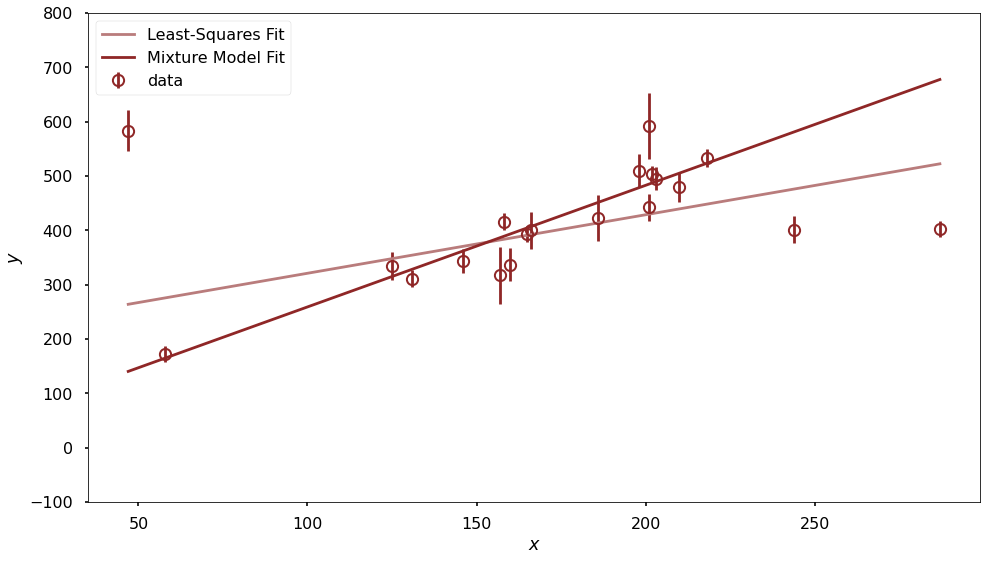

In [10]:
fig,ax = plt.subplots(figsize=(16,9))
xrange = np.linspace(x_sorted[0],x_sorted[-1])
ax.errorbar(x, y, σy, marker='o', ls='None', color=color['dark'], label='data', mfc='None', mec=color['dark'], mew=2)
ax.plot(xrange,func(xrange, fit['x']), color=color['mid'], label='Least-Squares Fit')
ax.plot(xrange,func(xrange, opt['x'][:2]), color=color['dark'], label='Mixture Model Fit')
ax.set_xlabel(r'$x$'); ax.set_ylabel(r'$y$')
ax.set_ylim(-100,800)
ax.legend()
plt.show()

This is much better, and all we had to do was introduce two additional hyper-parameters, the data purity $u$, and the bad variance $\eta$.

## MC solution

Now let's see how an MC simulation for this mixture model performs

\begin{align}
P(\Gamma\lvert D, I) &\propto L(\Gamma) \Pi(\Gamma)\\
\ln{L(\Gamma)} &= \sum_k\ln{\Big[u G(y_k\lvert\Theta) + (1-u) B(y_k\lvert\Theta, \eta)\Big]}\\
\Pi(\Gamma) &= P(m,b u, \eta\lvert I)
\end{align}

We will assume that the priors are independent of each other. For simplicity, we will also assume uniform priors for all parameters except $\eta$, for which we use Jeffreys' prior
\begin{align}
P(m,b,u,\eta\lvert I)&= P(m\lvert I)\times P(b\lvert I)\times P(u\lvert I)\times P(\eta\lvert I)\\
P(m\lvert I)&:\textrm{Uniform}\\
P(b\lvert I)&:\textrm{Uniform}\\
P(\eta\lvert I)&\propto \frac{1}{\eta}
\end{align}

Finally, we note that PYMC requires us to specify log-likelihood $\ln{L(\Gamma)}$ for our problem

In [11]:
# https://docs.pymc.io/advanced_theano.html
# y_in = m x_i + b
def logp(y_obs, σ_obs, y_g, η, u):
    r2 = (y_obs - y_g)**2
    G  = tt.exp(-r2/(2*σ_obs**2)) / (tt.sqrt(2*onp.pi*σ_obs**2))
    B  = tt.exp(-r2/(2*(σ_obs**2 + η**2))) / (tt.sqrt(2*onp.pi*(σ_obs**2+η**2)))
    return tt.sum(tt.log(u*G + (1-u)*B))

with pm.Model() as model_mix:
    # observed data as Theano shared variables ~ global data
    x_obs = th.shared(onp.array(x), name='x_obs')
    y_obs = th.shared(onp.array(y), name='y_obs')
    σ_obs = th.shared(onp.array(σy), name='σ_obs')
    
    
    # priors for unkown line model parameters (m,b)
    m = pm.Uniform('m', lower=0, upper = 10, testval=1)
    b = pm.Uniform('b', lower=-800, upper = 800, testval=0)
    y_g = pm.Deterministic('y_g', m*x_obs + b)
    
    # priors for outlier parameters (u, η)
    u    = pm.Uniform('u', lower=0, upper=1, testval=0.5)
    logη = pm.Uniform('logη', lower=-10, upper=10, testval=5)
    η    = pm.Deterministic('η', tt.exp(logη))


    likelihood = pm.DensityDist('likelihood', logp,
                                observed={'y_obs': y_obs,'σ_obs':σ_obs,'y_g':y_g, 'η':η, 'u':u})

# make sure there are no divergences with initial point
for RV in model_mix.basic_RVs:
    print(RV.name, RV.logp(model_mix.test_point))

m_interval__ -2.4079456086518722
b_interval__ -1.3862943611198906
u_interval__ -1.3862943611198906
logη_interval__ -1.6739764335716716
likelihood -162.7700867258116


In [12]:
with model_mix:
    trace_mix = pm.sample(10000, tune=20000, progressbar=True, random_seed = 1123581321)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [logη, u, b, m]
INFO:pymc3:NUTS: [logη, u, b, m]
Sampling 2 chains, 0 divergences: 100%|██████████| 60000/60000 [01:03<00:00, 950.70draws/s] 
The acceptance probability does not match the target. It is 0.6970200991002982, but should be close to 0.8. Try to increase the number of tuning steps.


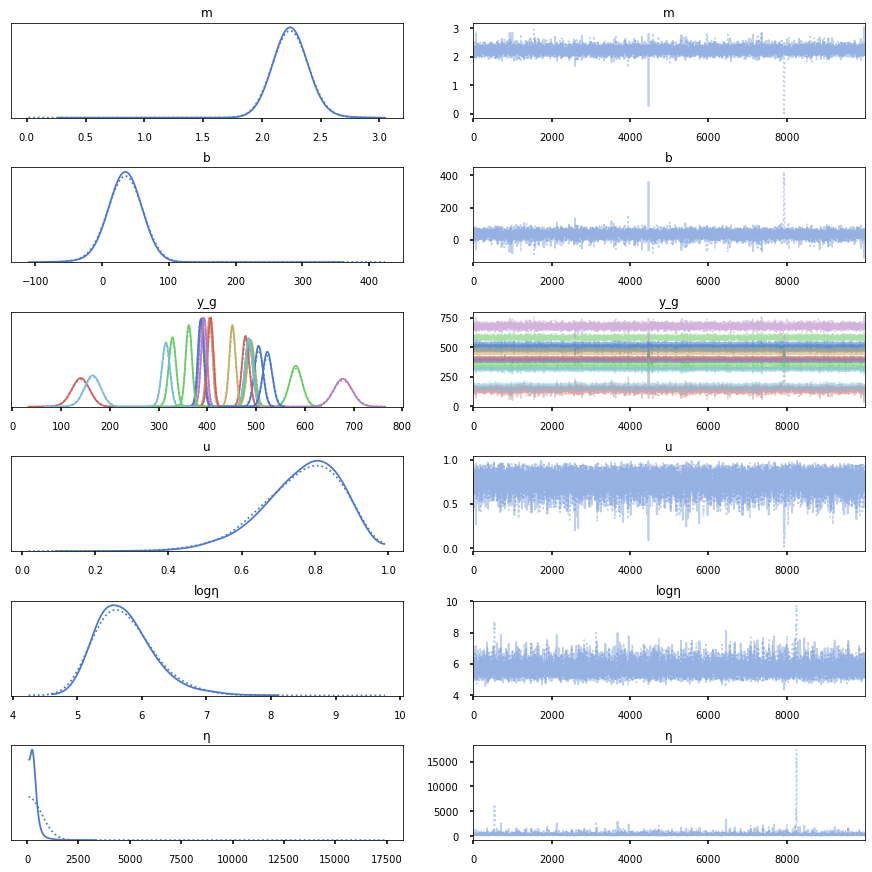

In [13]:
pm.traceplot(trace_mix)
plt.show();

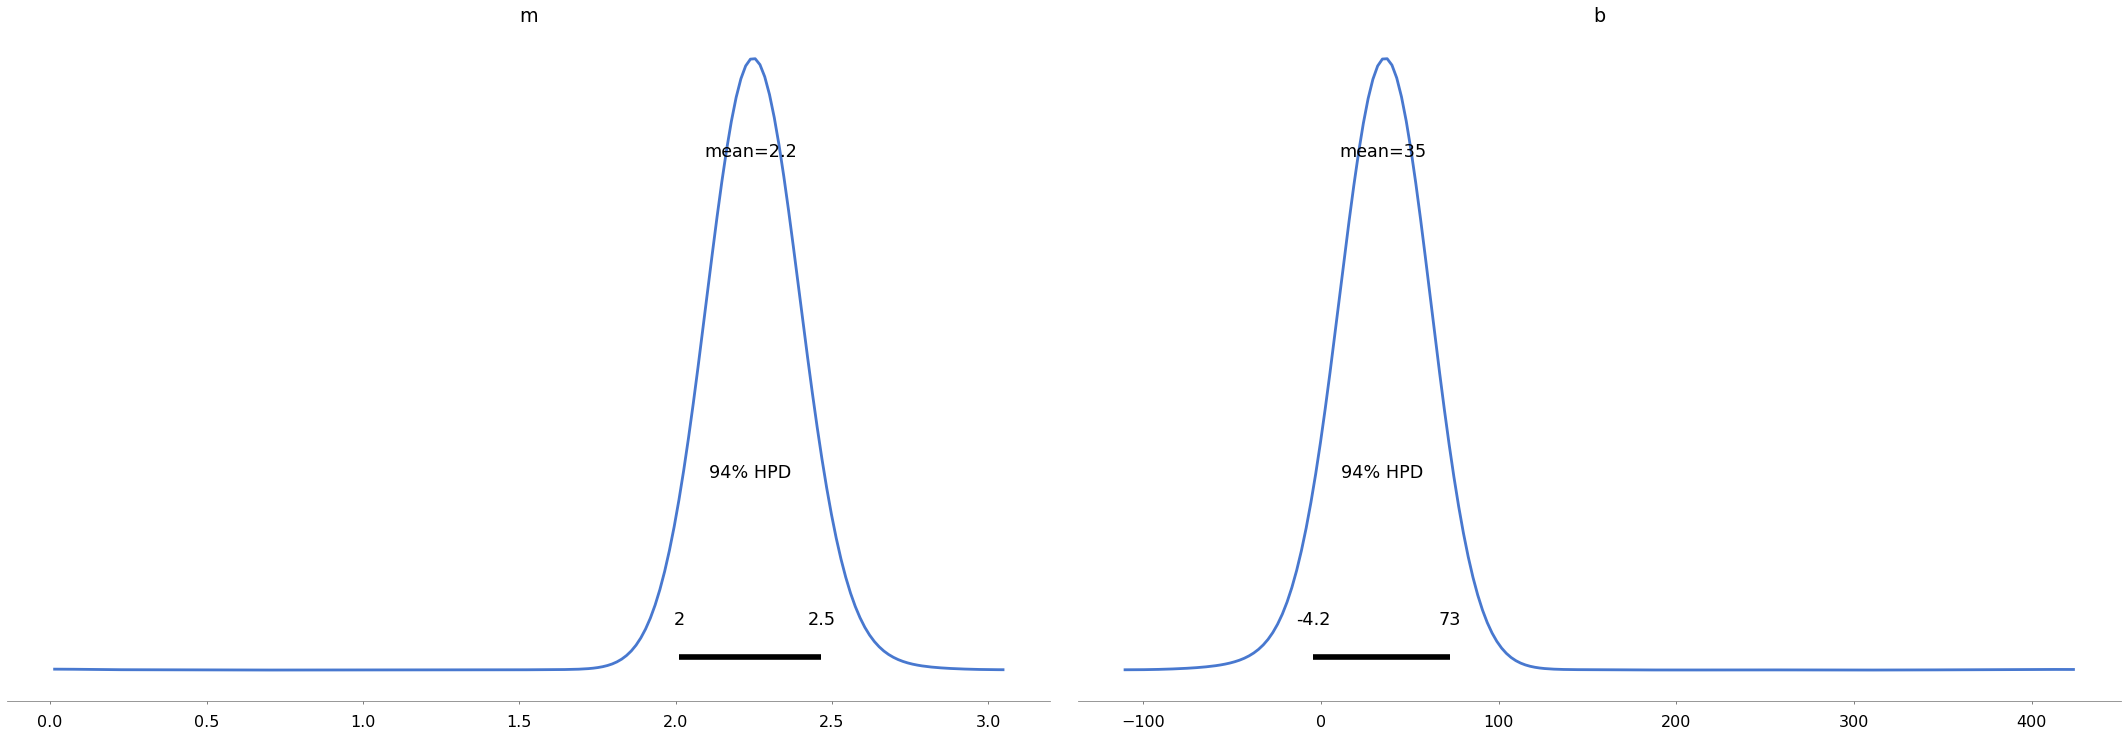

In [14]:
pm.plot_posterior(trace_mix, var_names=['m', 'b']);

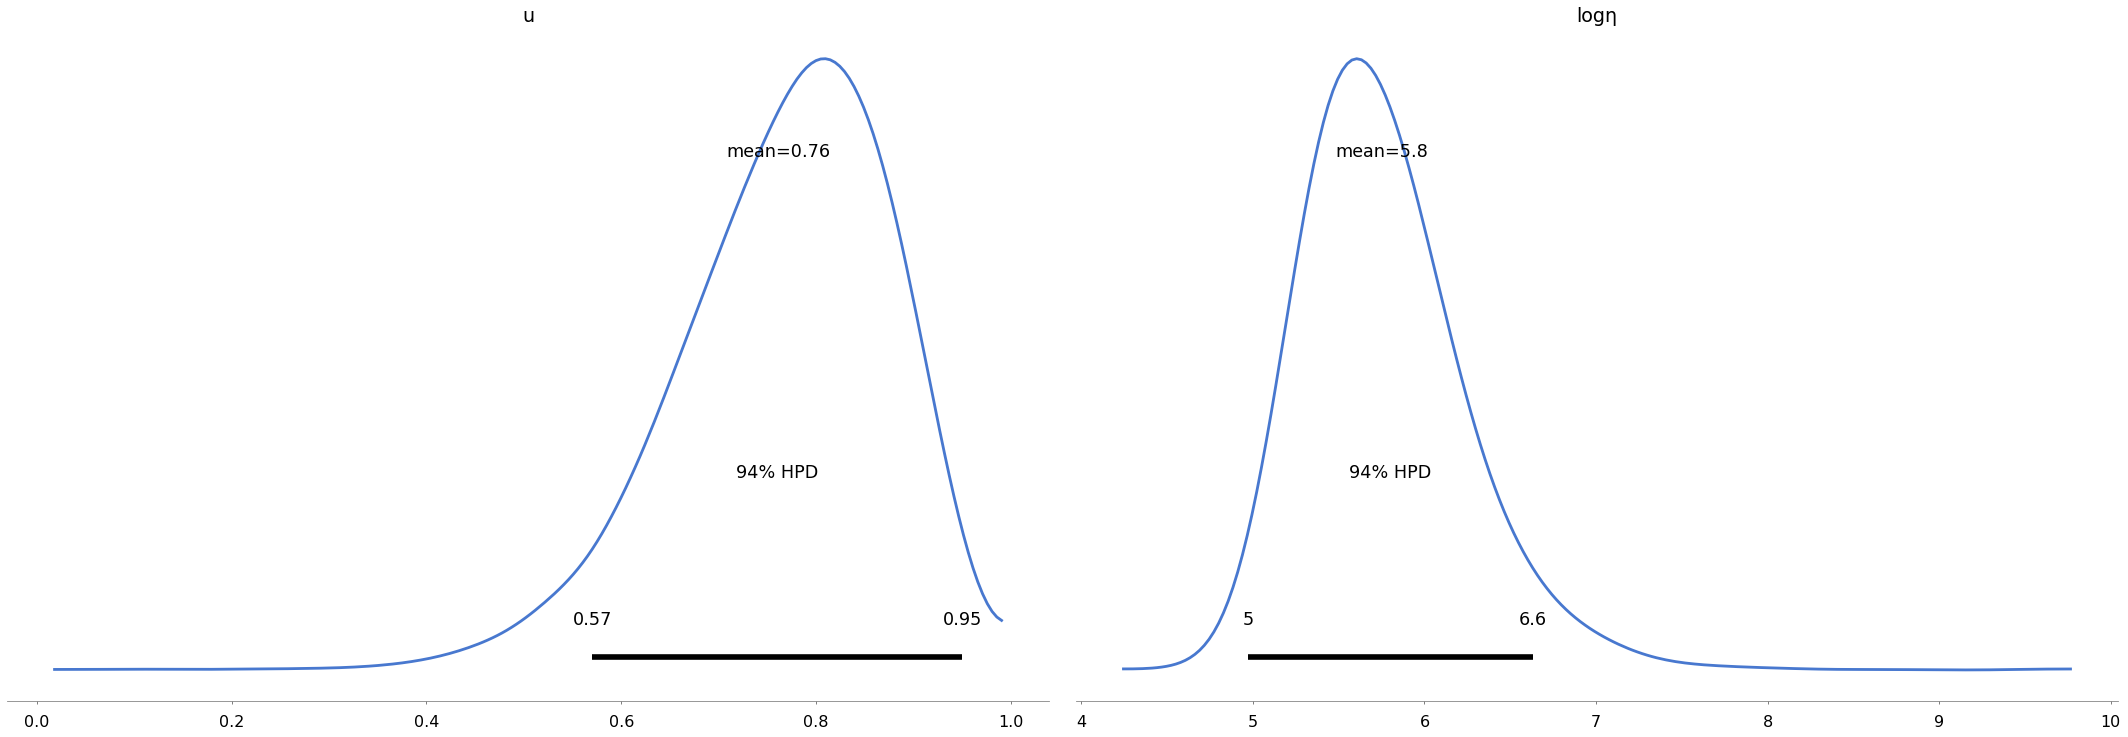

In [15]:
pm.plot_posterior(trace_mix, var_names=['u', 'logη']);

In [16]:
for i,l in enumerate(['m', 'b', 'u', 'logη']):
    lo,hi = pm.stats.hpd(trace_mix[l])
    avg,sig = opt['x'][i], np.sqrt(opt_ihess[i][i])
    print(f"\t\t {avg-2*sig:.3e} < {l} < {avg+2*sig:.3e}\t (Laplace)")
    print(f"\t\t {lo:.3e} < {l} < {hi:.3e}\t (MC)")
    print()

		 2.018e+00 < m < 2.457e+00	 (Laplace)
		 2.011e+00 < m < 2.466e+00	 (MC)

		 -1.930e+00 < b < 7.248e+01	 (Laplace)
		 -4.207e+00 < b < 7.274e+01	 (MC)

		 6.015e-01 < u < 1.014e+00	 (Laplace)
		 5.701e-01 < u < 9.501e-01	 (MC)

		 4.853e+00 < logη < 6.422e+00	 (Laplace)
		 4.973e+00 < logη < 6.631e+00	 (MC)



We see that the Laplace approximation gave us a pretty good estimate of the reliability!

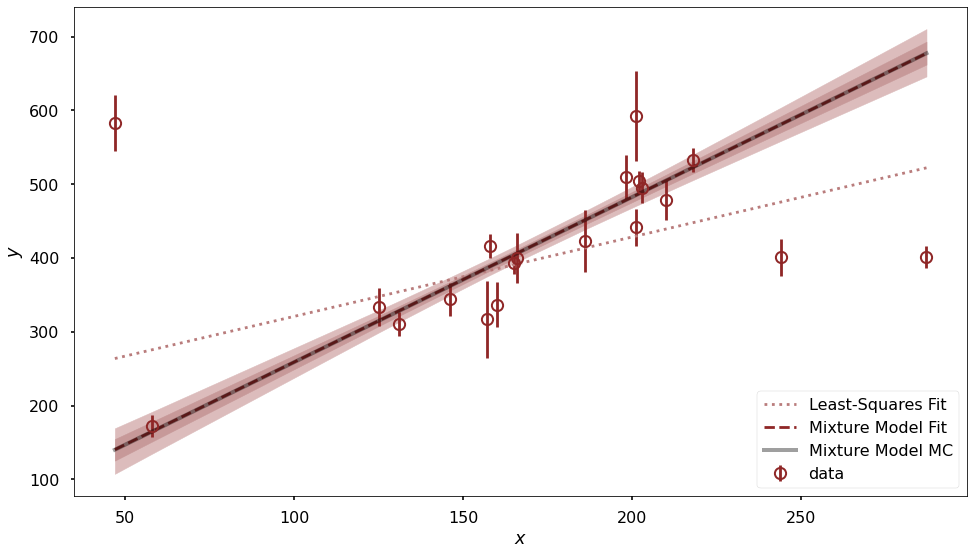

In [17]:
fig,ax = plt.subplots(figsize=(16,9))
ax.errorbar(x, y, σy, marker='o', ls='None', color=color['dark'], label='data', mfc='None', mec=color['dark'], mew=2)
ax.plot(xrange,func(xrange, fit['x']), color=color['mid'], label='Least-Squares Fit', ls=':')
ax.plot(xrange,func(xrange, opt['x'][:2]), color=color['dark'], label='Mixture Model Fit', ls='--')
ax.set_xlabel(r'$x$'); ax.set_ylabel(r'$y$')

plot_quantiles(ax, x[i_sort], trace_mix['y_g'][:,i_sort], quantiles_sig2, label='Mixture Model MC')
ax.legend(loc=4)
plt.show()

Here we show our predictions for $y$, obtained from the posterior distribution given by the MC simulation, i.e.,
\begin{align}
\langle y(x)\rangle &= \int\textrm{d}\Theta f(x;\Theta) p(\Theta\lvert D, I)
\end{align}
where the shaded regions are showing the $\pm \sigma$ and $\pm 2\sigma$ intervals. Note that this could also have been computed within the Laplace approximation. The benefit of the MC is that such averages are trivial to compute from the trace of the simulation. Again, we see excellent agreement between the MC predictions and the fit to the mixture-model.

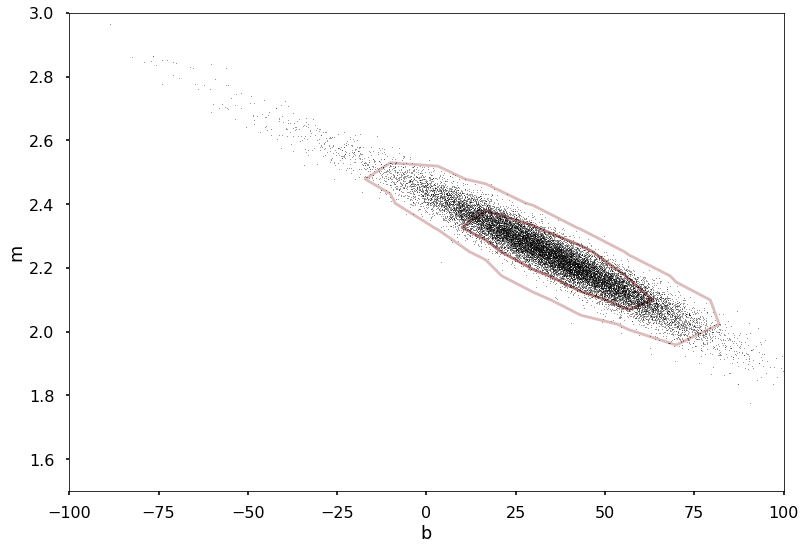

In [18]:
fig, ax = plt.subplots()
plot_MCMC_trace(ax, trace_mix['b'], trace_mix['m'], scatter=True, nbins=40, colors=[color['mid'], color['light']])
ax.set_xlabel('b')
ax.set_ylabel('m')
ax.set_xlim(-100,100)
ax.set_ylim(1.5, 3.0)
plt.show()

# Numerical Example (Exponential Model)

## MC solution

We are now ready to try the MC solution to the full exponential model. Recall that in this case
\begin{align}
\Gamma &= (\Theta, u, \eta, \{q_i\})\\
P(\Gamma\lvert D, I) &\propto L(\Gamma) \Pi(\Gamma) \\
L(\Gamma)&= \prod_i\Big(G(y_i\lvert\Theta)^{q_i}\times B(y_i\lvert\Theta, \eta)^{1-q_i}\Big) \\
\ln{L(\Gamma)} &= \sum_i\Big[q_i \ln{G(y_i\lvert\Theta)} + (1-q_i)\ln{B(y_i\lvert\Theta, \eta)}\Big] \\
&=\sum_{\text{good}}\left[-\frac{\left(y_i - f(X_i;\Theta)\right)^2}{2\sigma_i^2} - \frac{1}{2}\ln{2\pi\sigma_i^2}\right] + 
\sum_{\text{bad}}\left[-\frac{\left(y_i - f(X_i;\Theta)\right)^2}{2\left(\sigma_i^2+\eta^2\right)} - \frac{1}{2}\ln{2\pi(\sigma_i^2+\eta^2)}\right] \\
\end{align}

We use the same priors as above for $\Theta$, $u$, $\eta$, and use a Bernoulli distribution for the $\{q_k\}$, such that

\begin{align}
\Pi(\{q_k\}, u) &= P(\{q_k\}, u\lvert I) \\
&= P(\{q_k\}\lvert u, I) P(u\lvert I) \\
&\propto P(\{q_k\}\lvert u, I)\\
&= \prod_k P(q_k\lvert u, I)\\
&= \prod_k u^{q_k} \times \left(1-u\right)^{1-q_k}\\
&= u^M (1-u)^{N-M}
\end{align}
with $M=\sum_k q_k$

In [19]:
# https://docs.pymc.io/advanced_theano.html
# y_in = m x_i + b
def logp(y_obs, σ_obs, y_g, η, u, q):
    r2 = (y_obs - y_g)**2
    G  = -0.5*q*(r2/σ_obs**2 + tt.log(2*onp.pi*σ_obs**2))
    B  = -0.5*(1-q)*(r2/(σ_obs**2 + η**2) + tt.log(2*onp.pi*(σ_obs**2+η**2)))
    return tt.sum(G + B)

with pm.Model() as model_exp:
    # observed data as Theano shared variables ~ global data
    x_obs = th.shared(onp.array(x), name='x_obs')
    y_obs = th.shared(onp.array(y), name='y_obs')
    σ_obs = th.shared(onp.array(σy), name='σ_obs')
    
    
    # priors for unkown line model parameters (m,b)
    m = pm.Uniform('m', lower=0, upper = 10, testval=1)
    b = pm.Uniform('b', lower=-800, upper = 800, testval=0)
    y_g = pm.Deterministic('y_g', m*x_obs + b)
    
    # priors for outlier parameters (u, η)
    u    = pm.Uniform('u', lower=0, upper=1, testval=0.5)
    logη = pm.Uniform('logη', lower=-10, upper=10, testval=5)
    η    = pm.Deterministic('η', tt.exp(logη))
    q    = pm.Bernoulli('q', p=u, shape=x.shape)


    likelihood = pm.DensityDist('likelihood', logp,
                                observed={'y_obs': y_obs,'σ_obs':σ_obs,'y_g':y_g, 
                                          'η':η, 'u':u, 'q':q})

# make sure there are no divergences with initial point
for RV in model_exp.basic_RVs:
    print(RV.name, RV.logp(model_exp.test_point))

m_interval__ -2.4079456086518722
b_interval__ -1.3862943611198906
u_interval__ -1.3862943611198906
logη_interval__ -1.6739764335716716
q -13.862943611198906
likelihood -148.95080195551284


In [20]:
with model_exp:
    trace_exp = pm.sample(20000, tune=20000, progressbar=True, random_seed = 1123581321)

Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
INFO:pymc3:CompoundStep
>NUTS: [logη, u, b, m]
INFO:pymc3:>NUTS: [logη, u, b, m]
>BinaryGibbsMetropolis: [q]
INFO:pymc3:>BinaryGibbsMetropolis: [q]
Sampling 2 chains, 0 divergences: 100%|██████████| 80000/80000 [02:13<00:00, 600.12draws/s]
The number of effective samples is smaller than 10% for some parameters.


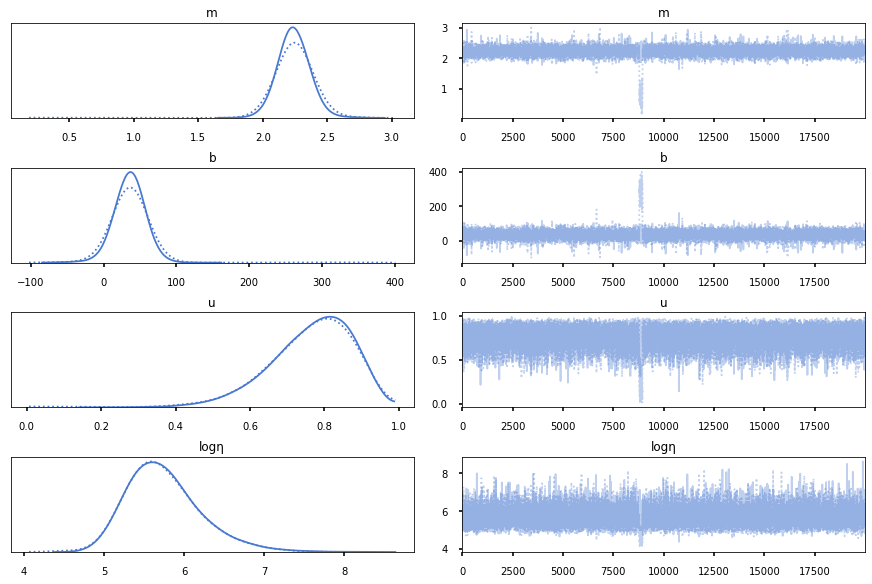

In [21]:
pm.traceplot(trace_exp, var_names=['m', 'b','u', 'logη']);

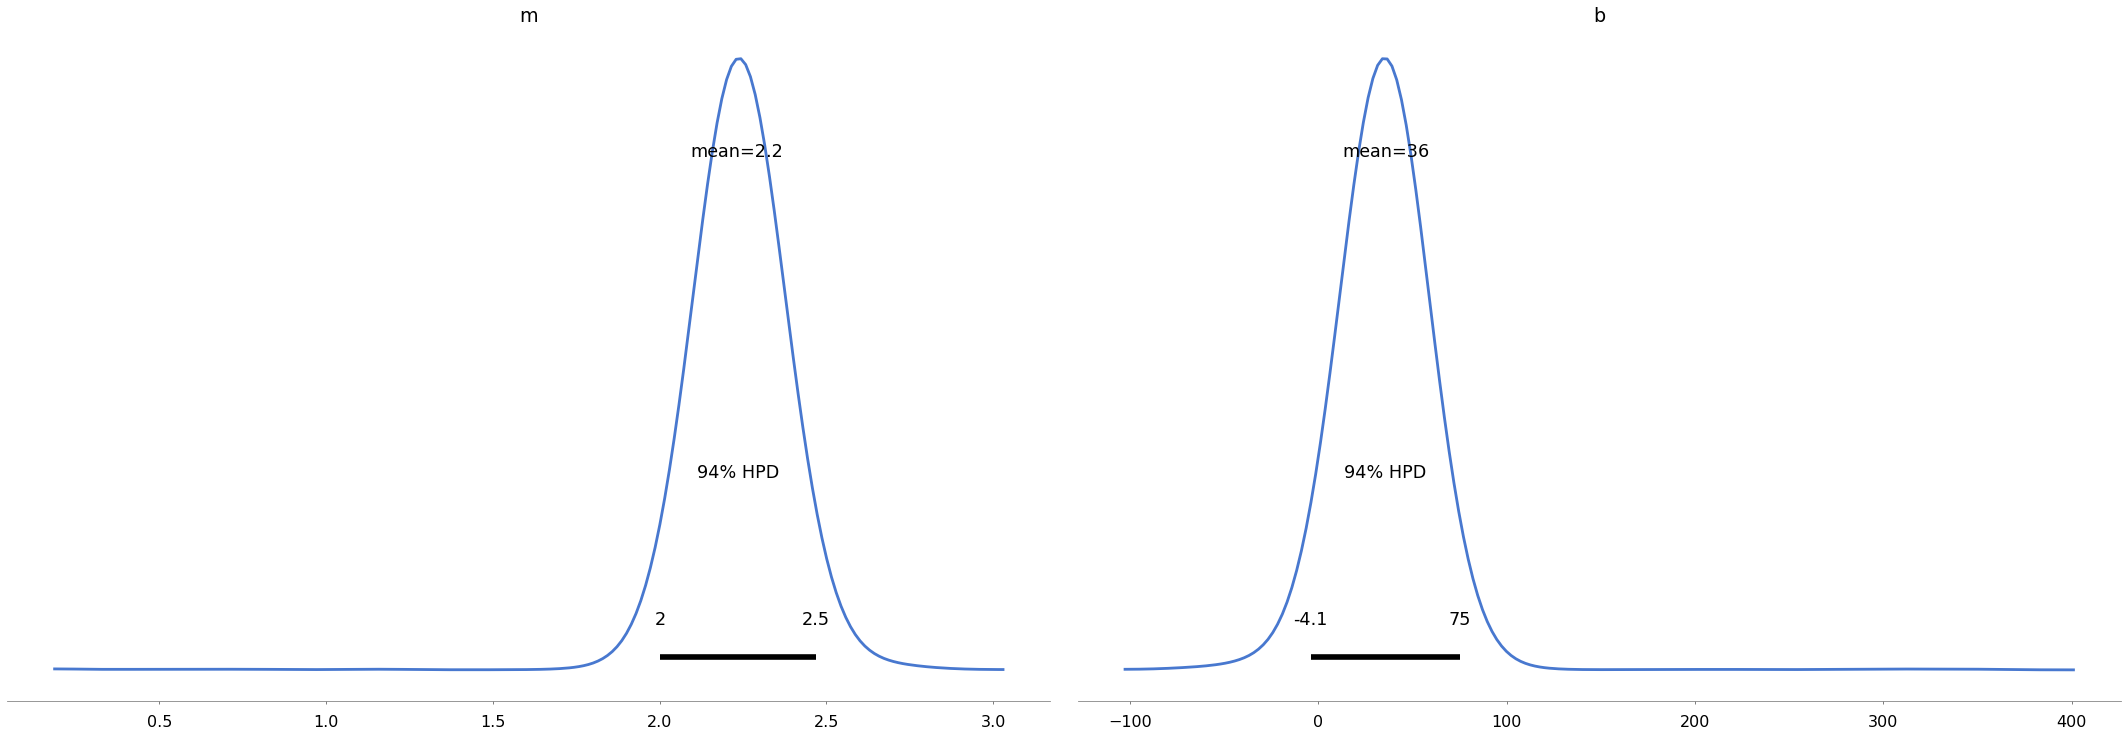

In [22]:
pm.plot_posterior(trace_exp, ['m', 'b']);

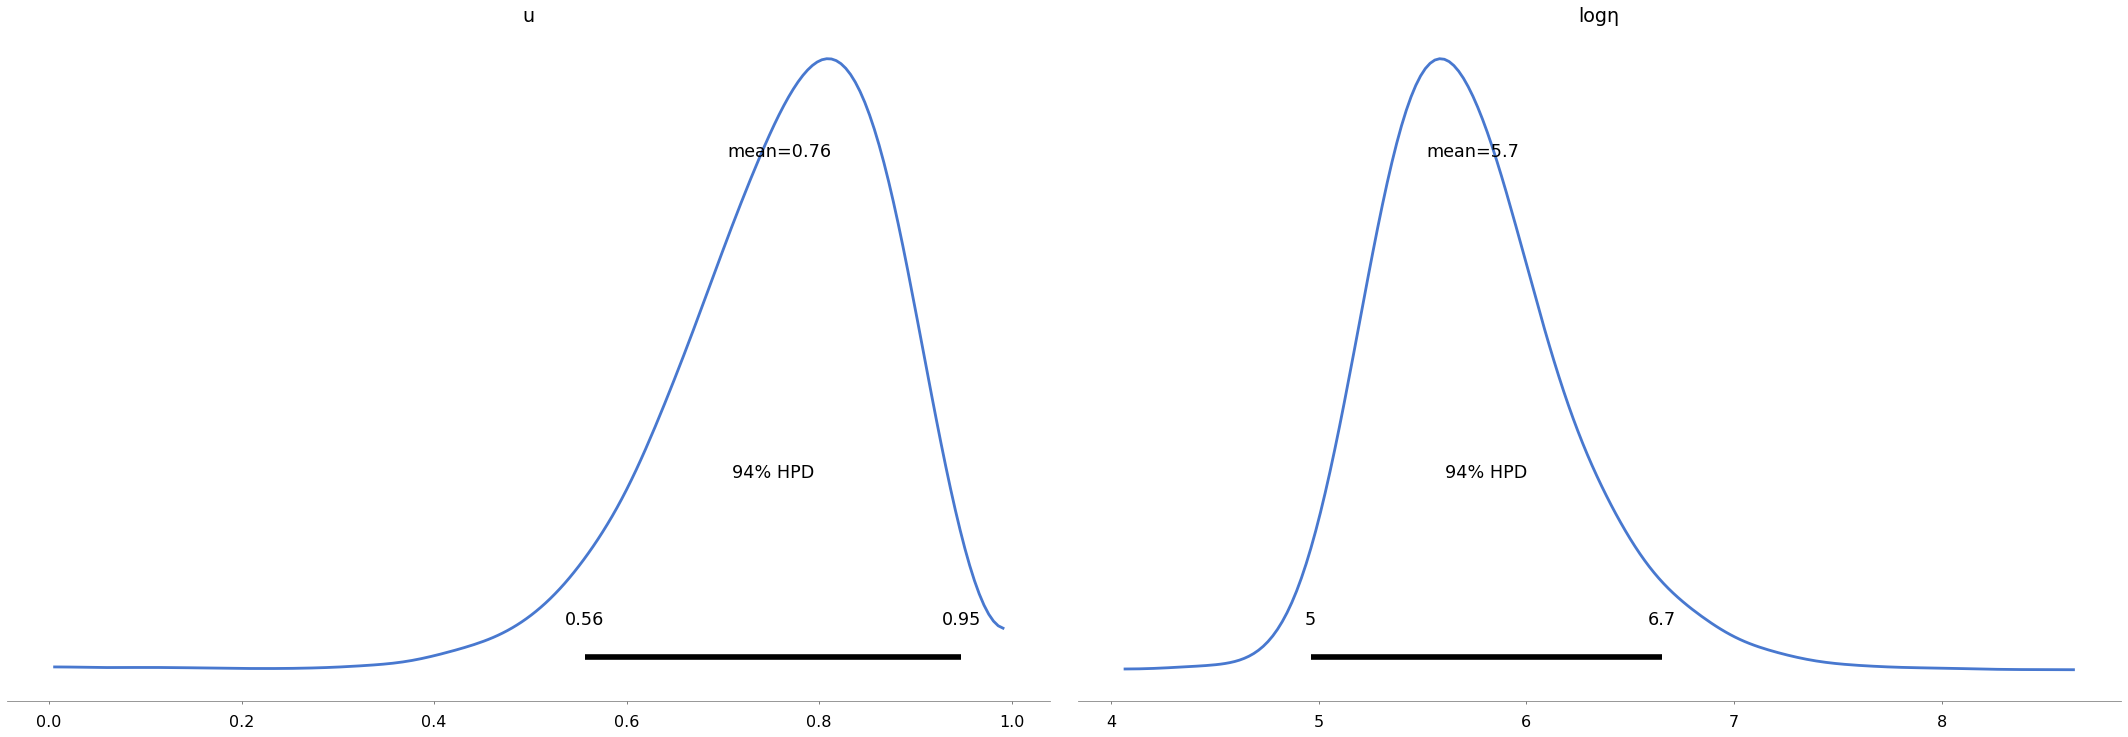

In [23]:
pm.plot_posterior(trace_exp, ['u', 'logη']);

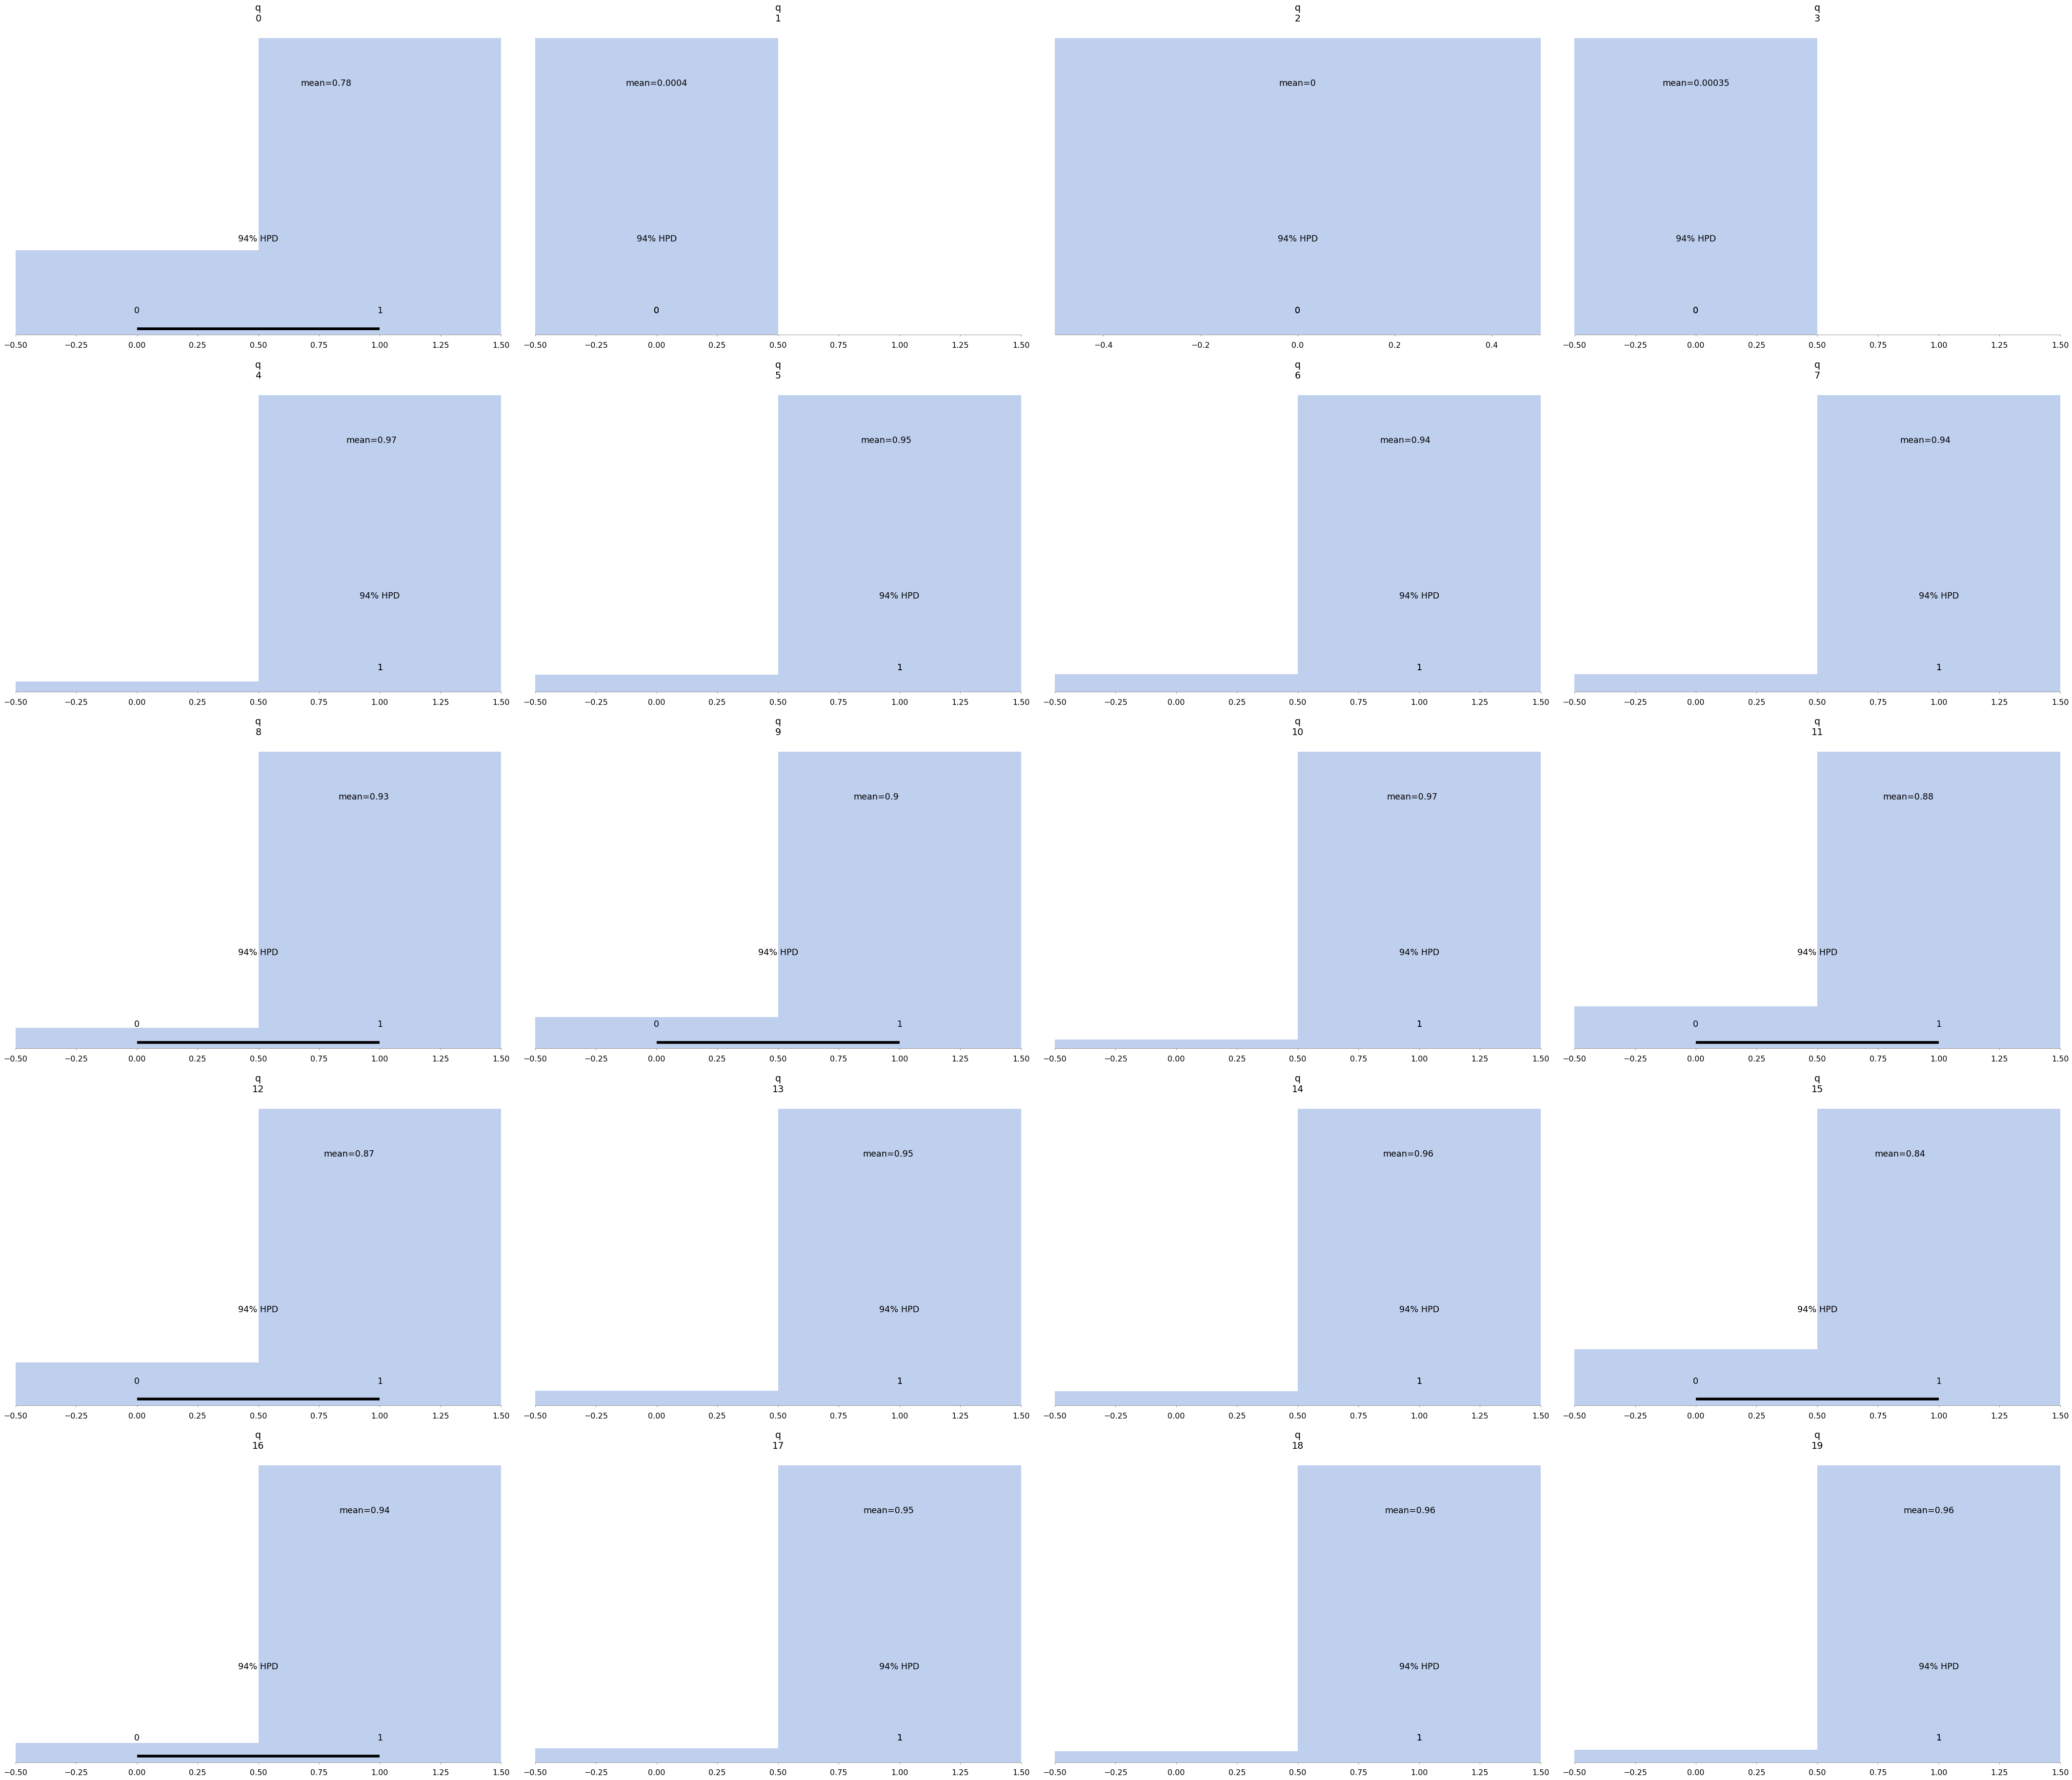

In [24]:
pm.plot_posterior(trace_exp, ['q']);

In [25]:
for i,l in enumerate(['m', 'b', 'u', 'logη']):
    lo0,hi0 = pm.stats.hpd(trace_mix[l])
    lo,hi   = pm.stats.hpd(trace_exp[l])
    
    avg,sig = opt['x'][i], np.sqrt(opt_ihess[i][i])
    print(f"\t\t {avg-2*sig:.3e} < {l} < {avg+2*sig:.3e}\t (mixture model - Laplace)")
    print(f"\t\t {lo0:.3e} < {l} < {hi0:.3e}\t (mixture model - MC)")
    print(f"\t\t {lo :.3e} < {l} < {hi :.3e}\t (exponential model - MC)")
    print()

		 2.018e+00 < m < 2.457e+00	 (mixture model - Laplace)
		 2.011e+00 < m < 2.466e+00	 (mixture model - MC)
		 2.002e+00 < m < 2.469e+00	 (exponential model - MC)

		 -1.930e+00 < b < 7.248e+01	 (mixture model - Laplace)
		 -4.207e+00 < b < 7.274e+01	 (mixture model - MC)
		 -4.059e+00 < b < 7.498e+01	 (exponential model - MC)

		 6.015e-01 < u < 1.014e+00	 (mixture model - Laplace)
		 5.701e-01 < u < 9.501e-01	 (mixture model - MC)
		 5.566e-01 < u < 9.479e-01	 (exponential model - MC)

		 4.853e+00 < logη < 6.422e+00	 (mixture model - Laplace)
		 4.973e+00 < logη < 6.631e+00	 (mixture model - MC)
		 4.961e+00 < logη < 6.652e+00	 (exponential model - MC)



As expected, the marginalized distributions for the model parameters $m$, $b$, $u$, and $\eta$ are essentially the same, regardless of whether we look at the mixture model or the exponential model.

### The Good, the Bad, and the Maybes

The benefit of using the exponential model, with additional hyper-parameters for the good/bad state of each point, is that we can make inferences about the state of the points.
Here, we are again following Jayne's (see Chapter 4, Elementary Hypothesis Testing). The odds for a given hypothesis, in this case, the odds for point $i$ to be a good point is defined as

\begin{align}
O(q_i = 1 | D, I) &\equiv \frac{P(q_i = 1 | D, I)}{P(q_i = 0 | D, I)}
\end{align}

where $P(q\lvert D, I)$ is given by marginalization of the full posterior
\begin{align}
P(q_i\lvert D, I) &= \int\mathrm{d}\Theta\mathrm{d}u\mathrm{d}\eta\,\sum_{\{q_j\}_{j\ne i}} P(\Theta, u, \eta, \{q_j\}\lvert D, I)
\end{align}

Since the points generated from the MC simulation are drawn in proportion to the full posterior, the marginalized distribution for $q_i$ is obtained by simply taking the trace over all other parameters. That is, we can approximate $P(q_i\lvert D, I)$ from the histogram of the $q_i$ values themselves. 


It's more convenient to look at this quantity in decibels, 
\begin{align}
e(q_i = 1 | D, I) &\equiv 10 \log_{10}{O(q_i = 1 | D I)}
\end{align}
Jayne's calls $e$ the evidence, but this conflicts with the (somewhat widespread) use of evidence to denote the normalization constant (partition function) in the definition of the posterior. We'll just call it $e$.

In [26]:
belief = pd.DataFrame({'P_good':onp.array([1/2, 2/3, 4/5, 10/11, 0.954, 100/101, 0.999, 0.9999])})
belief['O_good'] = belief['P_good'] / (1.0 - belief['P_good'])
belief['e_good'] = 10*onp.log10(belief['O_good'])
belief

,P_good,O_good,e_good
0,0.500000,1.00000,0.000000
1,0.666667,2.00000,3.010300
2,0.800000,4.00000,6.020600
3,0.909091,10.00000,10.000000
4,0.954000,20.73913,13.167905
5,0.990099,100.00000,20.000000
6,0.999000,999.00000,29.995655
7,0.999900,9999.00000,39.999566


This provides three scales for measuring our degrees of belief in $q_i$: $p(q_i =1)$, $O(q_i = 1)$, and $e(q_i = 1)$. It turns out we have a better intuition for $e$, with $3$db corresponding to a factor of 2 (in the odds), $10$db to a factor of 10, and $13$db to a probability of $95%$ (i.e. the $2\sigma$ criteria).

Let's calculate these quantities for each of the data points. The probability that a given $q_i$ is good is simply the fraction of points (in the parameter space) where $q_i = 1$, regardless of the values of the other $q_j$ (or the other parameter values).

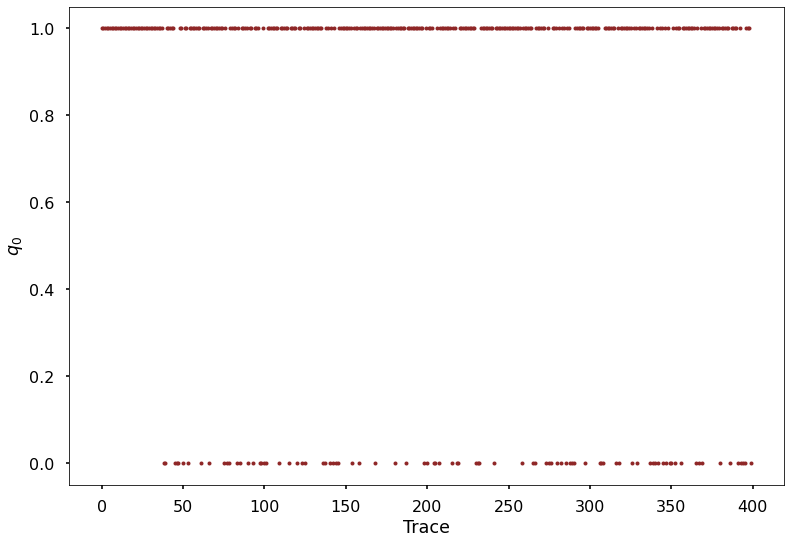

In [27]:
fig, ax = plt.subplots()
ax.plot(trace_exp['q'][::100,0], marker='o', ls='None', ms=4, color=color['dark']);
ax.set_xlabel('Trace')
ax.set_ylabel(r'$q_0$')
plt.show()

This is what the trace for $q_0$ looks like (note that we only show every 100 points)

In [28]:
belief = pd.DataFrame({'P_good':onp.average(trace_exp['q'], axis=0)})
belief['O_good'] = belief['P_good'] / (1.0 - belief['P_good'])
belief['e_good'] = 10*onp.log10(belief['O_good'])
belief

,P_good,O_good,e_good
0,0.778600,3.516712,5.461368
1,0.000400,0.000400,-33.977663
2,0.000000,0.000000,-inf
3,0.000350,0.000350,-34.557799
4,0.966475,28.828486,14.598218
5,0.945725,17.424689,12.411650
6,0.943750,16.777778,12.247344
7,0.944525,17.026138,12.311161
8,0.934400,14.243902,11.536290
9,0.904800,9.504202,9.779156


Notice that there are only three negative evidence values, corresponding to the three obvious outlier. This means that all other points are more likely to be good than bad ($p>1/2$).  
If we want, we can now label our points to show our belief in their good/bad state.
Note, that this is purely a cosmetic procedure, our estimate for the model parameters, $m$ and $b$, is obtained by averaging over all possible configurations of the system, consistent with our measured data and prior information.

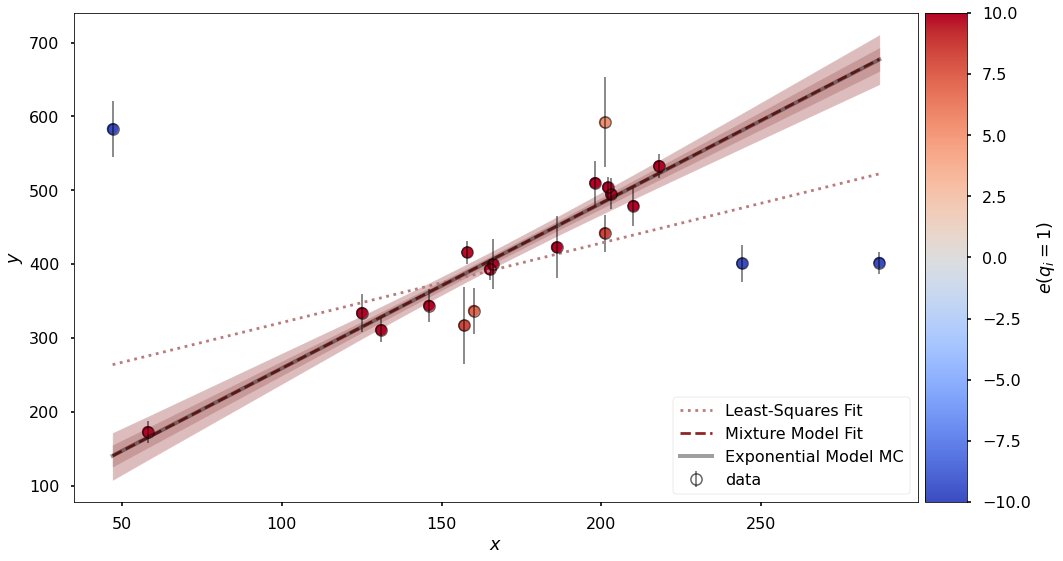

In [89]:
fig,ax = plt.subplots(figsize=(16,9))
ax.errorbar(x, y, σy, marker='o', ls='None', color=color['superfine'], label='data', mfc='None', alpha=0.6, mec='k', mew=1.5, lw=1.5)
ax.plot(xrange,func(xrange, fit['x']), color=color['mid'], label='Least-Squares Fit', ls=':')
ax.plot(xrange,func(xrange, opt['x'][:2]), color=color['dark'], label='Mixture Model Fit', ls='--')
ax.set_xlabel(r'$x$'); ax.set_ylabel(r'$y$')

plot_quantiles(ax, x[i_sort], trace_exp['y_g'][:,i_sort], quantiles_sig2, label='Exponential Model MC')
im = ax.scatter(x,y,c=np.clip(belief['e_good'].values, a_min=-10, a_max=10), cmap='coolwarm')
ax.legend(loc=4)
cb = colorbar(ax,im)
cb.set_label(r'$e(q_i = 1)$')
plt.show()

In [90]:
from pip._internal.operations.freeze import freeze
for requirement in freeze(local_only=True):
    print(requirement)

absl-py==0.9.0
appnope==0.1.0
arviz==0.7.0
attrs==19.3.0
backcall==0.1.0
bleach==3.1.4
certifi==2019.11.28
cffi==1.14.0
cftime==1.1.1.2
chardet==3.0.4
cryptography==2.8
cycler==0.10.0
decorator==4.4.2
defusedxml==0.6.0
entrypoints==0.3
fastcache==1.1.0
h5py==2.10.0
idna==2.9
importlib-metadata==1.6.0
ipykernel==5.2.0
ipython==7.13.0
ipython-genutils==0.2.0
ipywidgets==7.5.1
jax==0.1.62
jaxlib==0.1.42
jedi==0.16.0
Jinja2==2.11.1
json5==0.9.0
jsonschema==3.2.0
jupyter-client==6.1.2
jupyter-console==6.1.0
jupyter-core==4.6.3
jupyterlab==2.0.1
jupyterlab-server==1.1.0
kiwisolver==1.1.0
Mako==1.1.0
MarkupSafe==1.1.1
matplotlib==3.2.1
mistune==0.8.4
mkl-service==2.3.0
nbconvert==5.6.1
nbformat==5.0.4
netCDF4==1.5.3
notebook==6.0.3
numpy==1.18.1
opt-einsum==0+untagged.53.g6ab433b.dirty
packaging==20.1
pandas==1.0.3
pandocfilters==1.4.2
parso==0.6.2
patsy==0.5.1
pexpect==4.8.0
pickleshare==0.7.5
pip==20.0.2
prometheus-client==0.7.1
prompt-toolkit==3.0.5
protobuf==3.11.4
ptyprocess==0.6.0
pycpa